In [275]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pylab as plt

In [276]:
train = pd.read_csv('../data/titanic_train.csv')

In [277]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [278]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- NaN값 확인하기

In [279]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [280]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [281]:
for col in train.columns:
    print(str(col), train[col].isnull().sum()/train.shape[0],"%")

PassengerId 0.0 %
Survived 0.0 %
Pclass 0.0 %
Name 0.0 %
Sex 0.0 %
Age 0.19865319865319866 %
SibSp 0.0 %
Parch 0.0 %
Ticket 0.0 %
Fare 0.0 %
Cabin 0.7710437710437711 %
Embarked 0.002244668911335578 %


- Cabin : NaN값이 존재하는 이유? : 입석 or 몰래탄 사람

In [282]:
import seaborn as sns
sns.set()

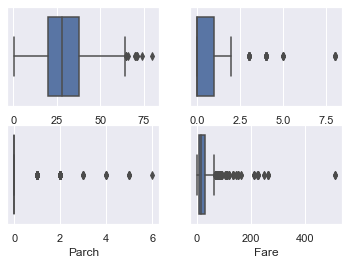

In [283]:
fig, ax = plt.subplots(2,2)
sns.boxplot(train['Age'], ax=ax[0,0])
sns.boxplot(train['SibSp'], ax=ax[0,1])
sns.boxplot(train['Parch'], ax=ax[1,0])
sns.boxplot(train['Fare'], ax=ax[1,1])

In [284]:
from collections import Counter
#Tukey method을 사용한다.
def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col],25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range(IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5*IQR
        # Determine a list of indeices of outliers
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        # 컬럼마다 outlier들에 대한 index값들을 저장
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
    
    return multiple_outliers

# detect outliers from Age, SibSp, Parch and Fare
Outlier_to_drop = detect_outliers(train, 2, ['Age','SibSp','Parch','Fare'])

C:\Users\1-17\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [285]:
Outlier_to_drop

[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [286]:
train.loc[Outlier_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [287]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Feature Analysis

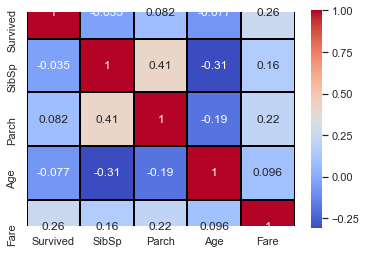

In [288]:
sns.heatmap(train[['Survived','SibSp','Parch','Age','Fare']].corr(),
           annot=True, cmap='coolwarm',
           linewidths=1, linecolor='black',fmt='.2g',square=True)

### SibSp : 세부적인 값들을 바탕으로 생존 여부에 대한 것을 보자  
아래 그래프로 알 수 있는 사실은?

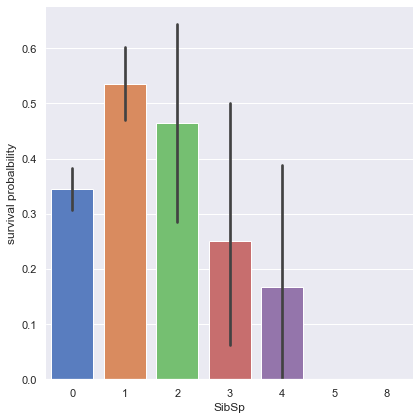

In [289]:
g = sns.catplot(x='SibSp', y='Survived',data=train, kind='bar', height=6, palette='muted')
g.despine(left=True)
g=g.set_ylabels('survival probalbility')

SibSp : 형제자매 명수  
형제자매가 적은 사람들이 생존확률이 높았다.

 ### Parch : 가족단위에 대해서 확인해보자

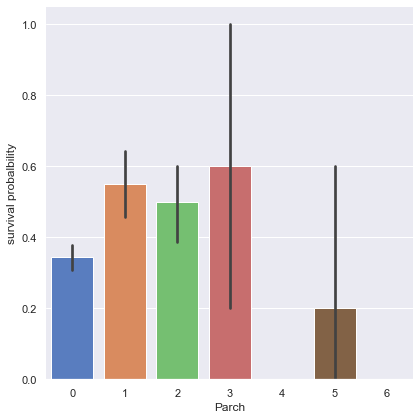

In [290]:
g = sns.catplot(x='Parch', y='Survived',data=train, kind='bar', height=6, palette='muted')
g.despine(left=True)
g=g.set_ylabels('survival probalbility')

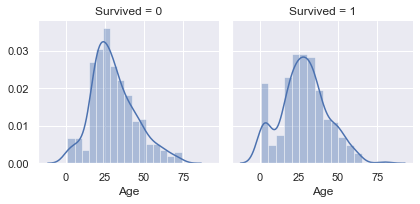

In [291]:
ax = sns.FacetGrid(train, col='Survived')
ax = ax.map(sns.distplot, 'Age')

- 나이에 따라 생존여부에 따라 그래프 모양이 조금 다르다

In [292]:
train.loc[:,['Survived','Age']].corr()

,Survived,Age
Survived,1.000000,-0.077221
Age,-0.077221,1.000000


- 해석: 나이의 분포가 생존자, 비생존자 사이에 다르게 나타난다.   
    생존자 경우 어린아이대가 높은 반면 사망자에서는 젊은 사람들이 더 많이 분포

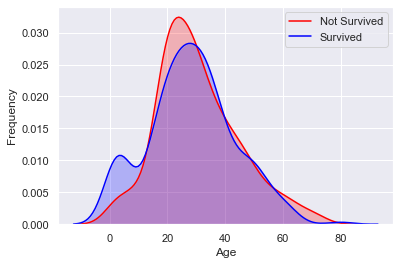

In [293]:
g = sns.kdeplot(train['Age'][(train['Survived']==0) & (train['Age'].notnull())],
               color = 'Red', shade = True)
g = sns.kdeplot(train['Age'][(train['Survived']==1) & (train['Age'].notnull())],
               color = 'Blue', shade = True)

g.set_xlabel('Age')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived','Survived'])

### Fare : 분포를 보고 outlier 분포를 살펴보자

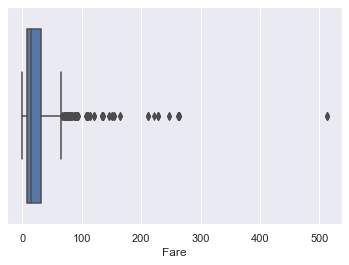

In [294]:
sns.boxplot(train['Fare'])

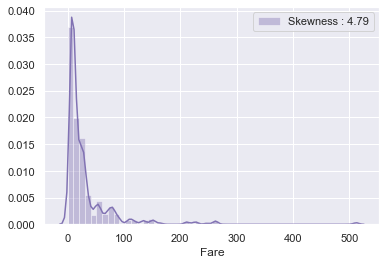

In [295]:
ax = sns.distplot(train['Fare'], color='m',label="Skewness : %.2f" %(train['Fare'].skew()))
ax = ax.legend(loc='best')

### skewness 가 존재할 시 log10으로 펼 수 있다.

In [296]:
train['Fare'] = train['Fare'].apply(lambda x: np.log(x) if x>0 else 0)

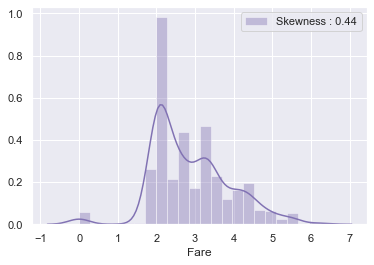

In [297]:
ax = sns.distplot(train['Fare'], color='m',label="Skewness : %.2f" %(train['Fare'].skew()))
ax = ax.legend(loc='best')

### Sex: 성별에 따른 분포를 보자

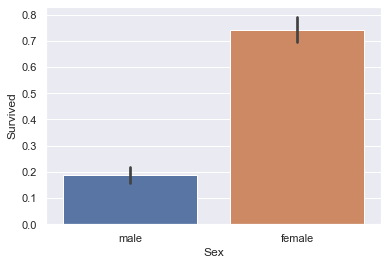

In [298]:
sns.barplot(x=train['Sex'], y=train['Survived'])

In [299]:
train[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


### Pclass

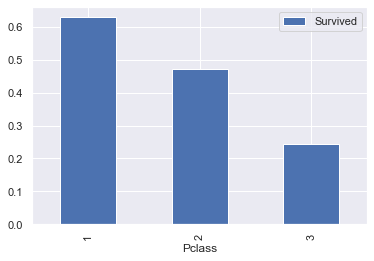

In [300]:
train[['Pclass','Survived']].groupby(['Pclass'], 
                                     as_index=True).mean().sort_values(by='Survived',
                                                                       ascending=False).plot.bar()

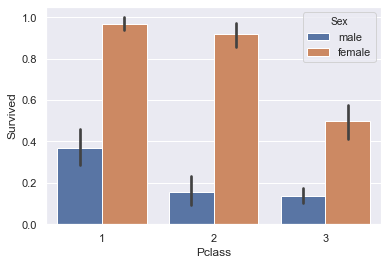

In [301]:
sns.barplot(x=train['Pclass'], y=train['Survived'], hue='Sex', data=train)

### Embarked : 빠진 데이터수 확인
- 제일 많이 나타나는 종류 확인
- 이를 바탕으로 빠진 데이터 ㅐ우기
- 각기 항복별 생존여부와 확인하기

In [302]:
print(train['Embarked'].isnull().sum())

2


In [303]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [304]:
train['Embarked'] = train['Embarked'].fillna('S')

In [305]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

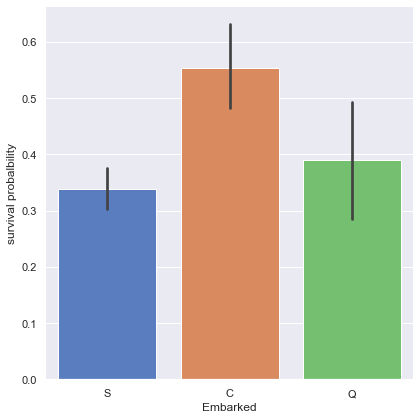

In [306]:
g = sns.catplot(x='Embarked', y='Survived',data=train, kind='bar', height=6, palette='muted')
g.despine(left=True)
g=g.set_ylabels('survival probalbility')

- C항구가 더 생존율이 높은 것을 알 수 있다.

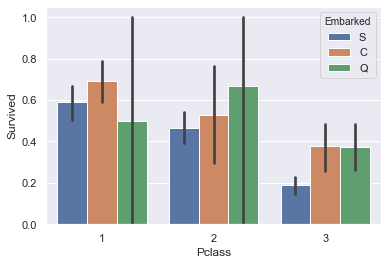

In [307]:
sns.barplot(x=train['Pclass'], y=train['Survived'], hue='Embarked',data=train)

- C항구가 1등석의 비율이 더 크다.

##  NaN을 찾자

In [308]:
train['Age'].isnull().sum()

177

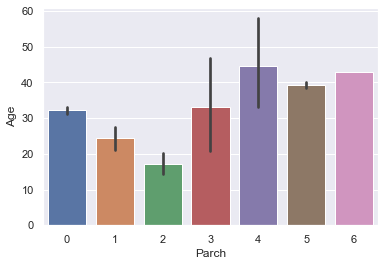

In [309]:
sns.barplot(y=train['Age'], x=train['Parch'], data=train)

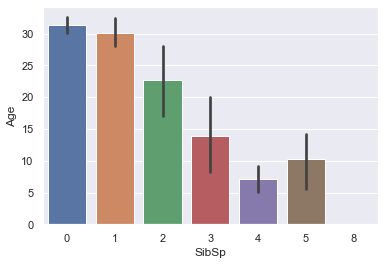

In [310]:
sns.barplot(y='Age', x='SibSp', data=train)

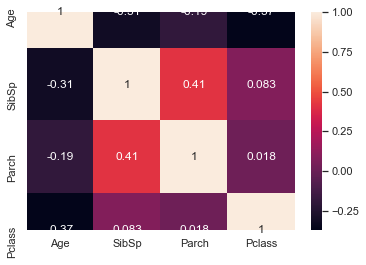

In [311]:
fig, ax = plt.subplots(nrows=1, ncols=1)
sns.heatmap(train.loc[:,['Age','Sex','SibSp','Parch','Pclass']].corr(), annot=True, ax=ax)

- Age 칼럼에 있는 NaN값을 처리할 때 Pclass와, SibSp, Parch와 똑같은 등급의 다른 데이터들을 모아서 median 처리

In [312]:
index_NaN_age = list(train['Age'][train['Age'].isnull()].index)

age_idx = train.columns.get_loc('Age')
SibSp_idx = train.columns.get_loc('SibSp')
Parch_idx = train.columns.get_loc('Parch')
Pclass_idx = train.columns.get_loc('Pclass')

for i in index_NaN_age:
    # 그냥 Age 칼럼에 대한 전체 데이터의 median 값
    age_med = train['Age'].median()
    # Age NaN인 데이터의 SibSp, Parch, Pclass가 같은 다른 데이터들의 Age들의 median값 
    age_pred = train['Age'][((train['SibSp']==train.iloc[i]['SibSp'])
                            & (train['Parch']==train.iloc[i]['Parch'])
                            & (train['Pclass']==train.iloc[i]['Pclass']))].median()
    
    if not np.isnan(age_pred):
        train.iat[i, age_idx] = age_pred
    else:
        # Age NaN 데이터의 정보들과 일치하는 다른 데이터가 하나도 존재하지 않을 때
        train.iat[i, age_idx] = age_med

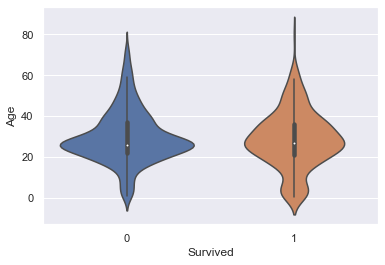

In [313]:
sns.violinplot(x='Survived', y ='Age', data=train)

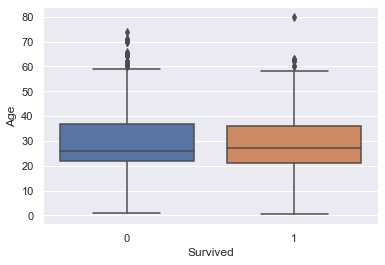

In [314]:
sns.boxplot(x='Survived', y ='Age', data=train)

## Cabin

In [315]:
train['Cabin'].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [316]:
train['Cabin'] = train['Cabin'].fillna("X")
train['Cabin'] = train['Cabin'].apply(lambda x : str(x)[:1])
train['Cabin'].isnull().sum()

0

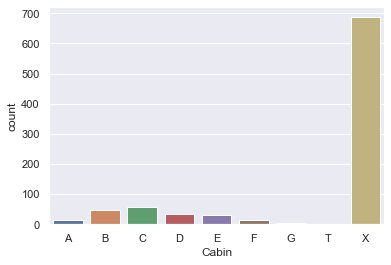

In [317]:
sns.countplot(train['Cabin'], order=['A','B','C','D','E','F','G','T','X'])

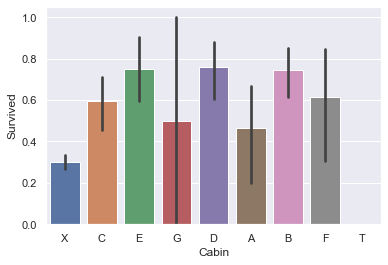

In [318]:
sns.barplot(y='Survived', x='Cabin', data=train)

## 새로운 지표 만들기

In [319]:
train['Fsize'] = train['SibSp'] + train['Parch'] + 1

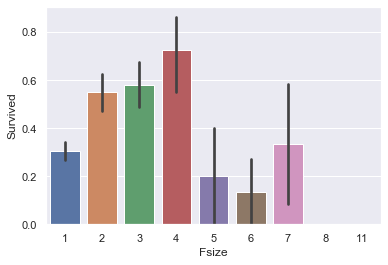

In [320]:
sns.barplot(x='Fsize', y='Survived',data=train)

In [321]:
train['Single'] = train['Fsize'].apply(lambda x: 1 if x==1 else 0)
train['SmallF'] = train['Fsize'].apply(lambda x: 1 if x==2 else 0)
train['MedF'] = train['Fsize'].apply(lambda x: 1 if 3<=x<=4 else 0)
train['LargeF'] = train['Fsize'].apply(lambda x: 1 if x>=5 else 0)

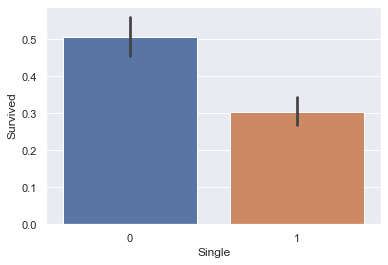

In [322]:
sns.barplot(x='Single', y='Survived', data=train)

## 전처리

In [323]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [324]:
def titanic_fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    
    return df

In [325]:
def format_feature(df):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df.loc[:,feature])
        df.loc[:,feature] = le.transform(df.loc[:,feature])
    return df

In [326]:
def drop_feature(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

In [327]:
def titanic_transform(df):
    df = titanic_fillna(df)
    df = drop_feature(df)
    df = format_feature(df)
    return df

In [328]:
X_titanic = titanic_transform(train)
X_titanic.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Fsize,Single,SmallF,MedF,LargeF
0,0,3,1,22.0,1,0,1.981001,8,2,2,0,1,0,0
1,1,1,0,38.0,1,0,4.266662,2,0,2,0,1,0,0
2,1,3,0,26.0,0,0,2.070022,8,2,1,1,0,0,0


In [340]:
y_titanic_train = X_titanic.iloc[:,0]
X_titanic_train = X_titanic.iloc[:,1:]

In [378]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_train, 
                                                    y_titanic_train, 
                                                    stratify = y_titanic_train,
                                                    test_size=0.3, 
                                                    random_state=1234)

In [330]:
from sklearn.model_selection import KFold

In [331]:
kfold = KFold(n_splits=5, random_state=0, shuffle =True)

In [332]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [333]:
from sklearn.model_selection import train_test_split

In [357]:
from sklearn.ensemble import RandomForestClassifier

In [358]:
rf_clf = RandomForestClassifier(n_jobs=-1, random_state=1234)

In [361]:
scores = cross_val_score(rf_clf,
                        X_train,
                        y_train,
                        cv=kfold)
for iter_count, accuracy in enumerate(scores):
    print("RF 교차검증 {0} & 정확도 {1:4f}".format(iter_count, accuracy))
    print("--------------------------")
    print("RF 교차검증 평균 정확도 : {0:.4f}".format(scores.mean()))

C:\Users\1-17\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\1-17\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\1-17\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\1-17\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF 교차검증 0 & 정확도 0.810056
--------------------------
RF 교차검증 평균 정확도 : 0.7991
RF 교차검증 1 & 정확도 0.797753
--------------------------
RF 교차검증 평균 정확도 : 0.7991
RF 교차검증 2 & 정확도 0.792135
--------------------------
RF 교차검증 평균 정확도 : 0.7991
RF 교차검증 3 & 정확도 0.814607
--------------------------
RF 교차검증 평균 정확도 : 0.7991
RF 교차검증 4 & 정확도 0.780899
--------------------------
RF 교차검증 평균 정확도 : 0.7991


C:\Users\1-17\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [362]:
tuned_parameters = {
    'n_estimators': [300,400,500,600,700,800],
    'max_features' : (np.arange(3, 8)),
    'criterion' : ['gini','entropy'],
    'bootstrap' : [True, False]
}

In [369]:
n_iter_search = 10
RF_rgs = RandomizedSearchCV(rf_clf, 
                             tuned_parameters, 
                             cv=kfold,
                             n_jobs=-1,
                             random_state=1234,
                             scoring='accuracy')

In [370]:
RF_rgc = RF_rgs.fit(X_train, y_train)

In [371]:
RF_rgc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=280,
                       n_jobs=-1, oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)

In [372]:
tuned_parameters = {
    'n_estimators': np.arange(200,400,10),
    'max_features' : np.arange(3, 8),
    'criterion' : ['entropy'],
    'bootstrap' : [True]
}

In [373]:
model_RF = GridSearchCV(rf_clf,
                        param_grid=tuned_parameters,
                        cv=kfold,
                        scoring='accuracy',
                        n_jobs=-1)

In [374]:
model_RF.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,...
                                              random_state=1234, verbose=0,
                                              warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['

In [375]:
model_RF.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=310,
                       n_jobs=-1, oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)

In [376]:
model_RF.best_score_

0.8215488215488216

In [417]:
RFC_best = model_RF.best_estimator_

RF_predictions = RFC_best.predict(X_test)
accuracy = accuracy_score(y_test, RF_predictions)
print("RF에서 GridSearchCV로 찾은 결과 : {0:.4f}".format(accuracy))

RF에서 GridSearchCV로 찾은 결과 : 0.9739


## XGBoost

- learning_rate: 0~1 (0.3 default) GBM의 학습률
- num_boost_rounds : GBM n_estimator와 같은 경우
- min_child_weight : GBM 의 min_child_leaf와 유사, 과적합 조절하는데 사용
- Gamma: 트리의 리프 노드를 추가로 나눌지 결정할 최소 손실 감소 값, 기준값보다 큰 손실이 감소된 경우에는 리프노드를 분리한다. 값이 클 수록 과적합 감소효과
- max_depth
- sub_sample
- colsample_bytree
- Lambda
- Alplha
- scale_pos_weight

학습 데스크 파라미터
- Object: 최소값을 가져야할 손실 함수를 정의. xgboost의 경우에는 많은 유형의 손실함수를 사용할 수 있음
- Binary: 이진 분류일 때 적용
- Multi:softmax: 다중 분류일 때
- Multi:softprob
- eval_metric: 검증에 사용되는 함수 : rmse, mae, logloss, error(2진의 경우 0.5기준), merrr, mlogloss, auc etc

Overfitting

In [334]:
import xgboost as xgb
from xgboost import XGBClassifier

In [390]:
XGBC = XGBClassifier(n_jobs=-1, random_state=1234)
xgc_param_grid = {
    'n_estimators' : [10, 30, 50],
    'min_child_weight' : np.arange(1,10,2),
    'max_depth' : np.arange(3,10,1)
}

In [393]:
n_iter_search = 10
xgv = RandomizedSearchCV(XGBC, 
                             xgc_param_grid, 
                             cv=kfold,
                             n_jobs=-1,
                             random_state=1234,
                             scoring='accuracy',
                            n_iter=n_iter_search)
xgv.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective...
                                           random_state=1234, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
              

In [394]:
xgv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=1234,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [396]:
parameters = {
    'n_estimators' : [50, 100, 150],
    'base_score' : np.arange(0.1,1,0.1),
    'booster' : ['gbtree'],
    'max_depth' : np.arange(3,7,1)
}

In [397]:
grid_xgb = GridSearchCV(XGBC, 
                             parameters, 
                             cv=kfold,
                             n_jobs=-1,
                        scoring='accuracy')

In [398]:
grid_xgb.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='bina...
                                     random_state=1234, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'base_score': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7

In [399]:
grid_xgb.best_score_

0.841091492776886

In [400]:
grid_xgb.best_estimator_

XGBClassifier(base_score=0.7000000000000001, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=1234,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [418]:
XGB_best = grid_xgb.best_estimator_
XGB_predictions = XGB_best.predict(X_test)
accuracy = accuracy_score(y_test, XGB_predictions)
print("XGB에서 GridSearchCV로 찾은 결과 : {0:.4f}".format(accuracy))

XGB에서 GridSearchCV로 찾은 결과 : 0.8134


# LightGBM

In [335]:
from lightgbm import LGBMClassifier

In [404]:
LGB = LGBMClassifier(random_state =1234, n_jobs = -1)
lb_param_grid = {
    'n_estimator' : [100, 200, 300],
    'learning_rate' : [0.1, 0.05, 0.01],
    'max_depth' : np.arange(3,7,1),
    'num_boost_round' : [1000]
    #'early_stopping_round' : 10
    
}

In [405]:
n_iter_search = 10
LGB_cif = RandomizedSearchCV(LGB, 
                             lb_param_grid, 
                             cv=7,
                             n_jobs=-1,
                             verbose = 1,
                             random_state=1234,
                             scoring='accuracy',
                            n_iter=n_iter_search)
LGB_cif.fit(X_train, y_train)

Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    3.1s finished
C:\Users\1-17\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RandomizedSearchCV(cv=7, error_score='raise-deprecating',
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=1234, reg_alpha=0.0,
                                            reg...da=0.0, silent=True,
                                            subsample=1.0,
                                            sub

In [406]:
LGB_cif.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=4,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimator=100, n_estimators=100, n_jobs=-1,
               num_boost_round=1000, num_leaves=31, objective=None,
               random_state=1234, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [407]:
LGB_cif.best_score_

0.8234349919743178

In [408]:
lb_param_grid = {
    'n_estimator' : [70,80,90,100,110,120],
    'learning_rate' : [0.005, 0.01, 0.015, 0.02],
    'max_depth' : np.arange(3,6,1),
    'num_boost_round' : [1000]
    #'early_stopping_round' : 10
    
}

In [409]:
grid_lgb = GridSearchCV(LGB, 
                             lb_param_grid, 
                             cv=kfold,
                             n_jobs=-1,
                        scoring='accuracy')

In [410]:
grid_lgb.fit(X_train, y_train)

C:\Users\1-17\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=1234, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=-1,
             param_grid={'l

In [411]:
grid_lgb.best_score_

0.8330658105939005

In [412]:
grid_lgb.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.005, max_depth=3,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimator=70, n_estimators=100, n_jobs=-1,
               num_boost_round=1000, num_leaves=31, objective=None,
               random_state=1234, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [413]:
LGBM_best = grid_lgb.best_estimator_
LGBM_predictions = LGBM_best.predict(X_test)
accuracy = accuracy_score(y_test, LGBM_predictions)
print("LGBM에서 GridSearchCV로 찾은 결과 : {0:.4f}".format(accuracy))

LGBM에서 GridSearchCV로 찾은 결과 : 0.7985


## Voting할 최적모델을 선정하기

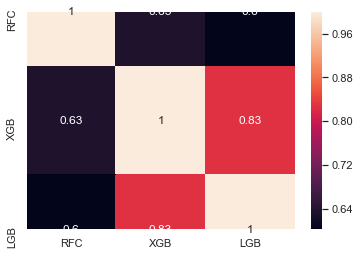

In [421]:
test_Survived_RFC = pd.Series(RFC_best.predict(X_test), name='RFC')
test_Survived_XGB = pd.Series(XGB_best.predict(X_test), name='XGB')
test_Survived_LGB = pd.Series(LGBM_best.predict(X_test), name='LGB')
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_XGB,test_Survived_LGB], axis=1)
sns.heatmap(ensemble_results.corr(), annot=True)

In [422]:
from sklearn.ensemble import VotingClassifier

In [425]:
eclf = VotingClassifier(estimators=[('randomForest', RFC_best),('xgboost',XGB_best),('lightGBM',LGBM_best)],
                       voting='hard')

eclf.fit(X_train, y_train)
eclf_pred = eclf.predict(X_test)
accuracy_voting = accuracy_score(y_test, eclf_pred)
print("Hard Voting에서 GridSearchCV로 찾은 결과 : {0:.4f}".format(accuracy_voting))

C:\Users\1-17\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Hard Voting에서 GridSearchCV로 찾은 결과 : 0.8022
